# Artificial Neural Network

In this notebook file, an ANN model will be trained with FabricWaste data for predict predict All Output Rates

In [1]:
#Libraries are being imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import __version__ as sklearnVersion

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from tensorflow.keras.metrics import MAE
from tensorflow.keras.callbacks import Callback
from tensorflow import __version__ as tensorflowVersion

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('sklearn Version: ' + sklearnVersion)
print('tensorflow Version: ' + tensorflowVersion)

numpy Version: 1.23.5
pandas Version: 1.5.2
matplotlib Version: 3.6.2
sklearn Version: 1.2.0
tensorflow Version: 2.10.0


In [3]:
#Constants are being defined
MODEL_NAME = 'ANN'
EPOCH_NUMBER = 50
BATCH_SIZE = 64

In [4]:
#Function to draw Chart
def DrawChart(title, value, predicted):
    plt.figure(figsize = (12, 6))
    plt.title(title)
    plt.scatter(value, predicted)
    plt.plot(value, value, 'r')
    plt.legend(['Predictions', 'LineOfRealValues'])

In [5]:
#trainingFrame is being created by reading a pkl file
trainingFrame = pd.read_pickle("../../../Data/DataSplit/Training.pkl")
trainingFrame.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect,OrderQuantity
0,-2.159842,0.903073,-0.903965,-0.494504,-1.292695,0.619725,-0.410849,1.097258,0.081156,0.803563,...,6,1,0,0,0,0,7,7,15,380
1,0.162054,-1.141753,-0.219059,1.554529,1.432512,-0.847058,-0.229250,0.049316,3.855226,1.932691,...,0,19,1,5,0,1,26,26,33,295
2,-0.249417,-2.523880,0.002460,-2.579382,0.628535,1.531744,0.705912,0.202348,-1.614852,-0.546322,...,0,5,0,0,0,0,5,5,21,310
3,-0.993506,-0.761118,0.053950,-1.878065,-1.164023,-1.238222,-0.260116,-0.716803,-1.282542,1.161412,...,0,1,0,0,0,0,1,1,6,370
4,4.394100,4.620156,6.910180,0.250664,2.236256,-1.335311,1.639115,1.140519,-2.365281,4.222803,...,17,12,1,0,0,0,30,30,44,1645


In [6]:
#Information of trainingFrame is being printed
trainingFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PC0                      150 non-null    float64
 1   PC1                      150 non-null    float64
 2   PC2                      150 non-null    float64
 3   PC3                      150 non-null    float64
 4   PC4                      150 non-null    float64
 5   PC5                      150 non-null    float64
 6   PC6                      150 non-null    float64
 7   PC7                      150 non-null    float64
 8   PC8                      150 non-null    float64
 9   PC9                      150 non-null    float64
 10  PC10                     150 non-null    float64
 11  PC11                     150 non-null    float64
 12  PC12                     150 non-null    float64
 13  PC13                     150 non-null    float64
 14  PC14                     1

In [7]:
#Statistical information of trainingFrame part to use is being printed
trainingFrame.loc[:, : 'DefectRate'].describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC21,PC22,PrintErrorRate,SewingErrorRate,FabricStainRate,FabricErrorRate,EmbroideryErrorRate,MeasureErrorRate,SecondQualityRate,DefectRate
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,...,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.368476e-17,-1.125026e-16,-1.065814e-16,-2.368476e-17,-2.368476e-17,1.539509e-16,4.736952e-17,-1.894781e-16,4.144833e-17,-1.465494e-16,...,-5.921189e-17,-1.125026e-16,0.004084,0.013615,0.000712,0.004679,0.000547,0.000825,0.024462,0.045132
std,2.742575e+00,2.575942e+00,2.354006e+00,2.106912e+00,1.869427e+00,1.709458e+00,1.562710e+00,1.494945e+00,1.336939e+00,1.319240e+00,...,9.204159e-01,9.104180e-01,0.008244,0.012301,0.001953,0.007235,0.002289,0.004019,0.017073,0.023845
min,-2.593435e+00,-5.356644e+00,-5.332553e+00,-3.363834e+00,-3.622670e+00,-4.180609e+00,-3.077161e+00,-3.586945e+00,-3.568800e+00,-4.299588e+00,...,-2.169231e+00,-3.550595e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002262,0.009091
25%,-1.663962e+00,-1.592389e+00,-1.189392e+00,-1.525014e+00,-1.378872e+00,-1.195458e+00,-6.770874e-01,-8.965826e-01,-8.102841e-01,-8.504962e-01,...,-5.420482e-01,-3.440578e-01,0.000000,0.004617,0.000000,0.000000,0.000000,0.000000,0.012884,0.028450
50%,-4.565722e-01,3.784231e-01,-2.626697e-01,-5.582300e-01,-6.168971e-01,1.307688e-01,-2.511817e-01,3.859758e-02,-1.363654e-01,1.792644e-03,...,-4.370206e-02,1.117789e-01,0.000000,0.009662,0.000000,0.002206,0.000000,0.000000,0.020761,0.039438
75%,3.168803e-01,1.385057e+00,7.821502e-01,1.150648e+00,1.266148e+00,1.173204e+00,4.458845e-01,9.306250e-01,5.667936e-01,6.908789e-01,...,4.777897e-01,5.891056e-01,0.004640,0.017848,0.000000,0.006057,0.000000,0.000000,0.030945,0.059436
max,1.304181e+01,5.395295e+00,1.014250e+01,6.680256e+00,5.805823e+00,4.858948e+00,5.377690e+00,5.203551e+00,3.855226e+00,5.227225e+00,...,2.954614e+00,4.063812e+00,0.044643,0.058282,0.013158,0.041667,0.015060,0.044643,0.079755,0.118812


In [8]:
#The outputName list is being created by getting the column names of the output features in order
outputName = trainingFrame.loc[:, 'PrintErrorRate' : 'DefectRate'].columns.tolist()
outputName

['PrintErrorRate',
 'SewingErrorRate',
 'FabricStainRate',
 'FabricErrorRate',
 'EmbroideryErrorRate',
 'MeasureErrorRate',
 'SecondQualityRate',
 'DefectRate']

In [9]:
#trainingX is being created with input features of trainingFrame
trainingX = trainingFrame.loc[:, : 'PC22'].values
trainingX.shape

(150, 23)

In [10]:
#trainingY is being created with Error Rate features of trainingFrame
#Rates in the 0-1 range are being multiplied by 100 to get them into the 0-100 range
trainingY = trainingFrame.loc[:, 'PrintErrorRate' : 'DefectRate'].values * 100
trainingY.shape

(150, 8)

In [11]:
#validationFrame is being created by reading a pkl file
validationFrame = pd.read_pickle("../../../Data/DataSplit/Validation.pkl")
validationFrame.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect,OrderQuantity
0,-1.601754,-0.408275,-0.788667,-1.142983,-1.512157,-0.353603,-0.338590,0.146634,-0.643450,1.333976,...,0,2,0,1,1,4,8,8,12,370
1,0.025378,0.418853,0.034701,4.251172,-0.396508,3.287433,1.986794,1.873284,0.665698,-0.663097,...,6,2,0,0,0,0,8,8,8,160
2,-0.697826,1.466843,-0.721390,3.081282,-0.023898,3.202064,1.800255,3.991179,1.138871,-0.348235,...,0,7,0,0,0,0,7,7,12,205
3,0.690207,-2.802670,0.039824,-0.452984,0.733203,1.993621,1.060869,-0.541040,-1.755796,0.481612,...,0,0,0,1,0,3,4,4,6,185
4,1.113541,-4.343674,1.501242,2.608504,0.282633,0.814241,0.213915,-1.158998,-1.689059,-1.494052,...,0,2,0,0,0,0,2,2,11,185


In [12]:
#Information of validationFrame is being printed
validationFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PC0                      25 non-null     float64
 1   PC1                      25 non-null     float64
 2   PC2                      25 non-null     float64
 3   PC3                      25 non-null     float64
 4   PC4                      25 non-null     float64
 5   PC5                      25 non-null     float64
 6   PC6                      25 non-null     float64
 7   PC7                      25 non-null     float64
 8   PC8                      25 non-null     float64
 9   PC9                      25 non-null     float64
 10  PC10                     25 non-null     float64
 11  PC11                     25 non-null     float64
 12  PC12                     25 non-null     float64
 13  PC13                     25 non-null     float64
 14  PC14                     25 

In [13]:
#Statistical information of validationFrame part to use is being printed
validationFrame.loc[:, : 'DefectRate'].describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC21,PC22,PrintErrorRate,SewingErrorRate,FabricStainRate,FabricErrorRate,EmbroideryErrorRate,MeasureErrorRate,SecondQualityRate,DefectRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-0.178009,0.841029,-0.330317,0.694910,0.526580,0.612656,1.003164,0.237304,-0.251614,-0.075676,...,-0.056123,0.055990,0.003628,0.017052,0.000371,0.004010,0.000098,0.001959,0.027119,0.042068
std,1.875163,2.388770,2.098771,2.001808,1.694058,2.025949,2.104197,1.842426,1.217884,1.119167,...,1.288558,0.676082,0.008077,0.014952,0.001057,0.008141,0.000491,0.005363,0.018203,0.022033
min,-2.587016,-4.473841,-3.172407,-1.951797,-1.512157,-2.481010,-2.011895,-3.519059,-2.678456,-1.494052,...,-2.051919,-1.644212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004678,0.005587
25%,-1.285835,0.217390,-1.713168,-0.615858,-0.748153,-0.835252,-0.335407,-0.647871,-1.130517,-0.819009,...,-0.831484,-0.383883,0.000000,0.005405,0.000000,0.000000,0.000000,0.000000,0.017007,0.028846
50%,-0.600887,1.337435,-0.663736,-0.069064,0.073777,0.653674,0.574539,0.146634,-0.017278,-0.366633,...,-0.181466,-0.112759,0.000000,0.014563,0.000000,0.000000,0.000000,0.000000,0.020161,0.038672
75%,0.087226,1.916686,0.039824,2.234394,1.788728,1.707645,1.986794,1.206313,0.653157,0.955768,...,0.591302,0.639270,0.003546,0.020161,0.000000,0.003571,0.000000,0.000000,0.040541,0.054054
max,5.128034,3.940754,7.384269,4.841975,5.556841,4.879057,5.052129,3.991179,2.202286,1.997094,...,3.210872,1.135576,0.033520,0.053892,0.004032,0.036290,0.002457,0.021739,0.074850,0.095808


In [14]:
#validationX is being created with input features of trainingFrame
validationX = validationFrame.loc[:, : 'PC22'].values
validationX.shape

(25, 23)

In [15]:
#validationY is being created with Error Rate features of validationFrame
#Rates in the 0-1 range are being multiplied by 100 to get them into the 0-100 range
validationY = validationFrame.loc[:, 'PrintErrorRate' : 'DefectRate'].values * 100
validationY.shape

(25, 8)

In [16]:
#CreateModel function that returns an ordinary Regression Artificial Neural Network Sequential Model is being defined
def CreateModel(inputSize, outputSize):
    model = Sequential()

    model.add(Dense(512, kernel_initializer = 'normal', input_dim = inputSize, activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))

    model.add(Dense(outputSize, kernel_initializer = 'normal', activation = 'linear'))
    
    return model

In [17]:
#A customized Callback class that inherits the tensorflow.keras.callbacks.Callback class is being defined

#This customized Callback class will perform the necessary checks at the end of each epoch
#and will update the weights of the bestModel with the weights  and metrics of the model
#This Callback also save the best model

#In this way, predictions and test operations can be repeated with the model with the lowest loss value
class KeepBest(Callback):
    def __init__(self, bestModel):
        self.bestLoss = None
        self.bestValLoss = None
        self.bestMAE = None
        self.bestValMAE = None
        self.bestModel = bestModel
        
    def on_epoch_end(self, epoch, logs=None):
        if self.bestValLoss is None or self.bestValLoss > logs['val_loss']:
            self.bestLoss = logs['loss']
            self.bestValLoss = logs['val_loss']
            self.bestMAE = logs['mean_absolute_error']
            self.bestValMAE = logs['val_mean_absolute_error']
            self.bestModel.set_weights(model.get_weights())
            model.save('../../Model/MultiOutput/NeuralNetwork/ANN.h5')

In [18]:
#A model to use for the KeepBest object is being created
bestModel = CreateModel(trainingX.shape[1], trainingY.shape[1])
bestModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 804,360
Trainable params: 804,360
Non-trainable params: 0
_________________________________________________________________


In [19]:
#A KeepBest object is being created
KeepBestObject = KeepBest(bestModel)

In [20]:
#A model is being created for training
model = CreateModel(trainingX.shape[1], trainingY.shape[1])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               12288     
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 804,360
Trainable params: 804,360
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Model is being compiled with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer = Adam(), loss = MSE, metrics=[MAE])

In [22]:
#model is being trained
model.fit(trainingX, trainingY,
          validation_data = (validationX, validationY),
          epochs = EPOCH_NUMBER, batch_size = BATCH_SIZE,
          callbacks = [KeepBestObject])

Epoch 1/50
3/3 [==============================] - 1s 227ms/step - loss: 4.0943 - mean_absolute_error: 1.0888 - val_loss: 1.7518 - val_mean_absolute_error: 0.8288
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 1.9519 - mean_absolute_error: 0.8195 - val_loss: 1.8227 - val_mean_absolute_error: 0.7424
Epoch 3/50
3/3 [==============================] - 0s 225ms/step - loss: 1.4152 - mean_absolute_error: 0.6691 - val_loss: 1.6984 - val_mean_absolute_error: 0.7382
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 1.2498 - mean_absolute_error: 0.6237 - val_loss: 1.7797 - val_mean_absolute_error: 0.8142
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 1.0423 - mean_absolute_error: 0.6533 - val_loss: 2.3758 - val_mean_absolute_error: 0.8816
Epoch 6/50
3/3 [==============================] - 0s 29ms/step - loss: 1.0146 - mean_absolute_error: 0.6309 - val_loss: 2.1280 - val_mean_absolute_error: 0.7919
Epoch 7/50
3/3 [================

In [23]:
#A DataFrame based on model.history data is being created named as lossFrame for chart
lossFrame = pd.DataFrame(model.history.history)
lossFrame.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,4.094277,1.088823,1.751810,0.828756
1,1.951917,0.819549,1.822700,0.742385
2,1.415248,0.669146,1.698438,0.738173
3,1.249776,0.623740,1.779727,0.814153
4,1.042298,0.653278,2.375782,0.881583


<AxesSubplot: >

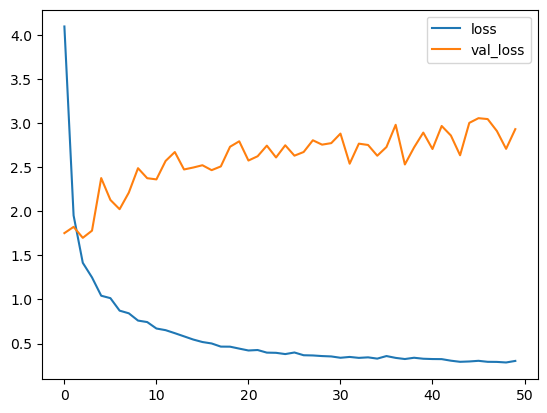

In [24]:
#A Loss chart based on lossFrame data is being plotted
lossFrame[['loss', 'val_loss']].plot()

<AxesSubplot: >

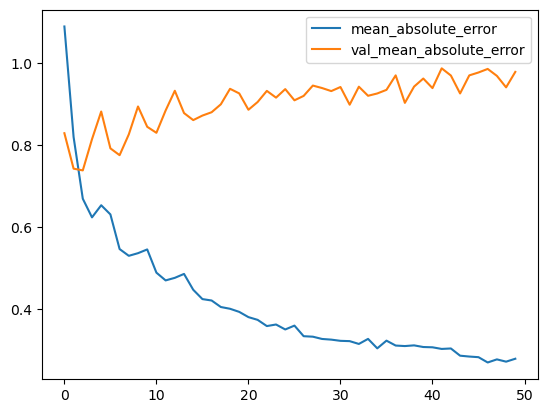

In [25]:
#A MAE chart based on lossFrame data is being plotted
lossFrame[['mean_absolute_error', 'val_mean_absolute_error']].plot()

In [26]:
#predictions are being made by trained model on trainingX data
predictions = KeepBestObject.bestModel.predict(trainingX)
predictions.shape

5/5 [==============================] - 0s 7ms/step


(150, 8)

In [27]:
#resultFrame based on predictions and real values is being created
resultDict = {'Model' : [], 'Data' : [], 'ColumName' : [], 'MeanAbsoluteError' : [],
              'MeanSquaredError' : [], 'SqrtMeanSquaredError' : []}
for i in range(predictions.shape[1]):
    resultDict['Model'].append(MODEL_NAME)
    resultDict['Data'].append('Training')
    resultDict['ColumName'].append(outputName[i])
    resultDict['MeanAbsoluteError'].append(mean_absolute_error(trainingY[:,i], predictions[:,i]))
    resultDict['MeanSquaredError'].append(mean_squared_error(trainingY[:,i], predictions[:,i]))
    resultDict['SqrtMeanSquaredError'].append(np.sqrt(mean_squared_error(trainingY[:,i], predictions[:,i])))
    
resultDict['Model'].append(MODEL_NAME)
resultDict['Data'].append('Training')
resultDict['ColumName'].append('Average')
resultDict['MeanAbsoluteError'].append(np.mean(resultDict['MeanAbsoluteError']))
resultDict['MeanSquaredError'].append(np.mean(resultDict['MeanSquaredError']))
resultDict['SqrtMeanSquaredError'].append(np.mean(resultDict['SqrtMeanSquaredError']))

resultFrame = pd.DataFrame(resultDict)
resultFrame

,Model,Data,ColumName,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
0,ANN,Training,PrintErrorRate,0.448321,0.631999,0.794983
1,ANN,Training,SewingErrorRate,0.826239,1.281360,1.131972
2,ANN,Training,FabricStainRate,0.121014,0.038866,0.197144
3,ANN,Training,FabricErrorRate,0.442660,0.465391,0.682196
4,ANN,Training,EmbroideryErrorRate,0.116893,0.055598,0.235793
5,ANN,Training,MeasureErrorRate,0.179054,0.146970,0.383367
6,ANN,Training,SecondQualityRate,1.101175,2.585782,1.608037
7,ANN,Training,DefectRate,1.724402,5.225723,2.285984
8,ANN,Training,Average,0.619970,1.303961,0.914935


In [28]:
#predictions are being made by trained model on validationX data
predictions = KeepBestObject.bestModel.predict(validationX)
predictions.shape

1/1 [==============================] - 0s 16ms/step


(25, 8)

In [29]:
#resultFrame based on predictions and real values is being created
resultDict = {'Model' : [], 'Data' : [], 'ColumName' : [], 'MeanAbsoluteError' : [],
              'MeanSquaredError' : [], 'SqrtMeanSquaredError' : []}
for i in range(predictions.shape[1]):
    resultDict['Model'].append(MODEL_NAME)
    resultDict['Data'].append('Validation')
    resultDict['ColumName'].append(outputName[i])
    resultDict['MeanAbsoluteError'].append(mean_absolute_error(validationY[:,i], predictions[:,i]))
    resultDict['MeanSquaredError'].append(mean_squared_error(validationY[:,i], predictions[:,i]))
    resultDict['SqrtMeanSquaredError'].append(np.sqrt(mean_squared_error(validationY[:,i], predictions[:,i])))
    
resultDict['Model'].append(MODEL_NAME)
resultDict['Data'].append('Validation')
resultDict['ColumName'].append('Average')
resultDict['MeanAbsoluteError'].append(np.mean(resultDict['MeanAbsoluteError']))
resultDict['MeanSquaredError'].append(np.mean(resultDict['MeanSquaredError']))
resultDict['SqrtMeanSquaredError'].append(np.mean(resultDict['SqrtMeanSquaredError']))

resultFrame = pd.concat([resultFrame, pd.DataFrame(resultDict)]).reset_index(drop = True)
resultFrame

,Model,Data,ColumName,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
0,ANN,Training,PrintErrorRate,0.448321,0.631999,0.794983
1,ANN,Training,SewingErrorRate,0.826239,1.281360,1.131972
2,ANN,Training,FabricStainRate,0.121014,0.038866,0.197144
3,ANN,Training,FabricErrorRate,0.442660,0.465391,0.682196
4,ANN,Training,EmbroideryErrorRate,0.116893,0.055598,0.235793
5,ANN,Training,MeasureErrorRate,0.179054,0.146970,0.383367
6,ANN,Training,SecondQualityRate,1.101175,2.585782,1.608037
7,ANN,Training,DefectRate,1.724402,5.225723,2.285984
8,ANN,Training,Average,0.619970,1.303961,0.914935
9,ANN,Validation,PrintErrorRate,0.450781,0.639818,0.799886


In [30]:
#testFrame is being created by reading a pkl file
testFrame = pd.read_pickle("../../../Data/DataSplit/Test.pkl")
testFrame.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,SecondQuality,CalculatedSecondQuality,Defect,OrderQuantity
0,-2.013910,1.995143,-1.926260,-1.974847,-0.470229,-0.920815,5.463404,-2.759364,2.244603,-0.119326,...,2,15,5,2,0,2,25,26,32,420
1,0.081436,0.312799,-0.204645,4.329446,-0.406149,3.267323,2.083090,1.907919,0.579843,-0.524113,...,0,3,0,1,0,0,4,4,5,150
2,-0.275271,3.378519,6.180660,-3.070387,-1.256094,2.695950,-1.440188,-1.783384,1.923091,-3.025943,...,93,26,2,3,0,0,123,124,143,4395
3,0.943398,-4.813578,0.824529,0.275050,0.786546,0.370814,0.870501,0.563257,-2.901741,-3.165466,...,0,3,1,0,0,0,4,4,5,200
4,-0.379232,3.409618,-3.162239,2.686746,3.859326,0.532266,-1.527445,-1.047937,-1.601517,-0.551928,...,0,0,0,0,5,0,5,5,7,170


In [31]:
#Information of testFrame is being printed
testFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PC0                      25 non-null     float64
 1   PC1                      25 non-null     float64
 2   PC2                      25 non-null     float64
 3   PC3                      25 non-null     float64
 4   PC4                      25 non-null     float64
 5   PC5                      25 non-null     float64
 6   PC6                      25 non-null     float64
 7   PC7                      25 non-null     float64
 8   PC8                      25 non-null     float64
 9   PC9                      25 non-null     float64
 10  PC10                     25 non-null     float64
 11  PC11                     25 non-null     float64
 12  PC12                     25 non-null     float64
 13  PC13                     25 non-null     float64
 14  PC14                     25 

In [32]:
#Statistical information of testFrame part to use is being printed
testFrame.loc[:, : 'DefectRate'].describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC21,PC22,PrintErrorRate,SewingErrorRate,FabricStainRate,FabricErrorRate,EmbroideryErrorRate,MeasureErrorRate,SecondQualityRate,DefectRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.013024,0.454578,-0.202597,0.279146,-0.191783,0.205207,0.494423,-0.527151,0.060211,-0.557505,...,0.567818,0.239675,0.003294,0.015150,0.000676,0.003143,0.001066,0.000173,0.023501,0.041856
std,2.863422,2.356419,2.651003,2.553474,1.846505,1.743946,2.241005,1.566362,1.592350,1.674245,...,1.379990,0.852453,0.005886,0.015264,0.002298,0.003419,0.005205,0.000864,0.016756,0.020805
min,-2.551436,-4.813578,-5.463644,-4.955933,-2.546559,-3.651559,-3.551327,-2.782388,-2.901741,-5.528565,...,-1.965344,-2.033394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004032,0.016129
25%,-0.758804,-1.143406,-1.556957,-1.558052,-1.478593,-0.849267,-0.887723,-1.783384,-0.906136,-0.831912,...,-0.529781,-0.181202,0.000000,0.004693,0.000000,0.000000,0.000000,0.000000,0.011312,0.029144
50%,-0.379232,0.395125,-0.315427,0.275050,-0.512525,0.087782,0.200355,-0.501114,-0.104364,-0.430639,...,0.848378,0.480764,0.000000,0.009050,0.000000,0.003546,0.000000,0.000000,0.020590,0.036458
75%,0.085605,1.995143,0.415892,2.469710,0.351512,1.472206,0.870501,0.563257,0.579843,0.518843,...,1.588861,0.707311,0.004255,0.018182,0.000000,0.004545,0.000000,0.000000,0.027273,0.048193
max,12.352104,3.858221,7.682068,4.371193,5.226237,3.279513,5.463404,2.711760,3.024043,1.731993,...,3.393513,2.035233,0.020480,0.065657,0.010799,0.013158,0.026042,0.004320,0.070707,0.101010


In [33]:
#testX is being created with input features of testFrame
testX = testFrame.loc[:, : 'PC22'].values
testX.shape

(25, 23)

In [34]:
#testY is being created with Error Rate features of testFrame
#Rates in the 0-1 range are being multiplied by 100 to get them into the 0-100 range
testY = testFrame.loc[:, 'PrintErrorRate' : 'DefectRate'].values * 100
testY.shape

(25, 8)

In [35]:
#Predictions are made on the test data with the model with the lowest loss value
predictions = KeepBestObject.bestModel.predict(testX)

1/1 [==============================] - 0s 32ms/step


In [36]:
#Shape of predictions is being printed
predictions.shape

(25, 8)

In [37]:
#resultFrame based on predictions and real values is being created
resultDict = {'Model' : [], 'Data' : [], 'ColumName' : [], 'MeanAbsoluteError' : [],
              'MeanSquaredError' : [], 'SqrtMeanSquaredError' : []}
for i in range(predictions.shape[1]):
    resultDict['Model'].append(MODEL_NAME)
    resultDict['Data'].append('Test')
    resultDict['ColumName'].append(outputName[i])
    resultDict['MeanAbsoluteError'].append(mean_absolute_error(testY[:,i], predictions[:,i]))
    resultDict['MeanSquaredError'].append(mean_squared_error(testY[:,i], predictions[:,i]))
    resultDict['SqrtMeanSquaredError'].append(np.sqrt(mean_squared_error(testY[:,i], predictions[:,i])))
    
resultDict['Model'].append(MODEL_NAME)
resultDict['Data'].append('Test')
resultDict['ColumName'].append('Average')
resultDict['MeanAbsoluteError'].append(np.mean(resultDict['MeanAbsoluteError']))
resultDict['MeanSquaredError'].append(np.mean(resultDict['MeanSquaredError']))
resultDict['SqrtMeanSquaredError'].append(np.mean(resultDict['SqrtMeanSquaredError']))

resultFrame = pd.concat([resultFrame, pd.DataFrame(resultDict)]).reset_index(drop = True)
resultFrame

,Model,Data,ColumName,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
0,ANN,Training,PrintErrorRate,0.448321,0.631999,0.794983
1,ANN,Training,SewingErrorRate,0.826239,1.281360,1.131972
2,ANN,Training,FabricStainRate,0.121014,0.038866,0.197144
3,ANN,Training,FabricErrorRate,0.442660,0.465391,0.682196
4,ANN,Training,EmbroideryErrorRate,0.116893,0.055598,0.235793
5,ANN,Training,MeasureErrorRate,0.179054,0.146970,0.383367
6,ANN,Training,SecondQualityRate,1.101175,2.585782,1.608037
7,ANN,Training,DefectRate,1.724402,5.225723,2.285984
8,ANN,Training,Average,0.619970,1.303961,0.914935
9,ANN,Validation,PrintErrorRate,0.450781,0.639818,0.799886


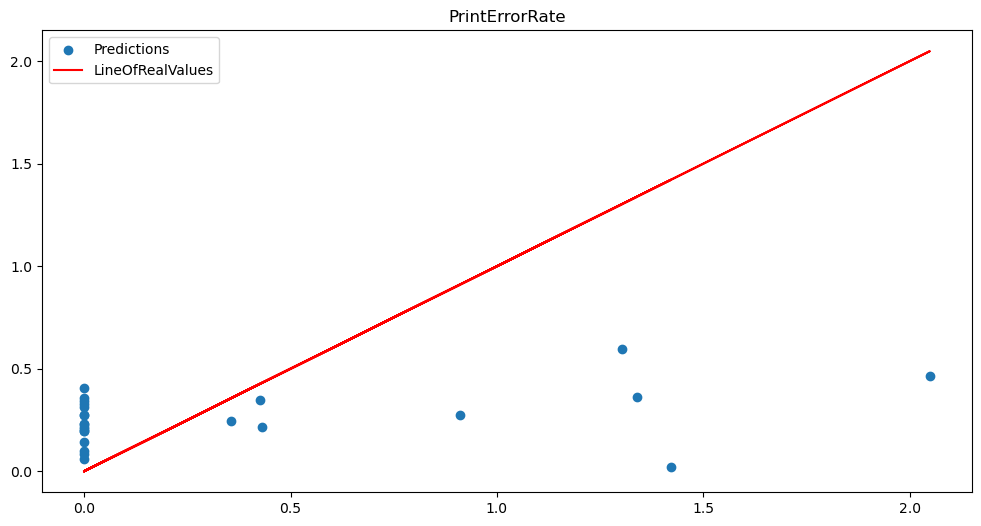

In [38]:
#Chart to show the closeness of the PrintErrorRate predictions to the true values is being plaotted
index = 0
DrawChart(outputName[index], testY[:, index], predictions[:, index])

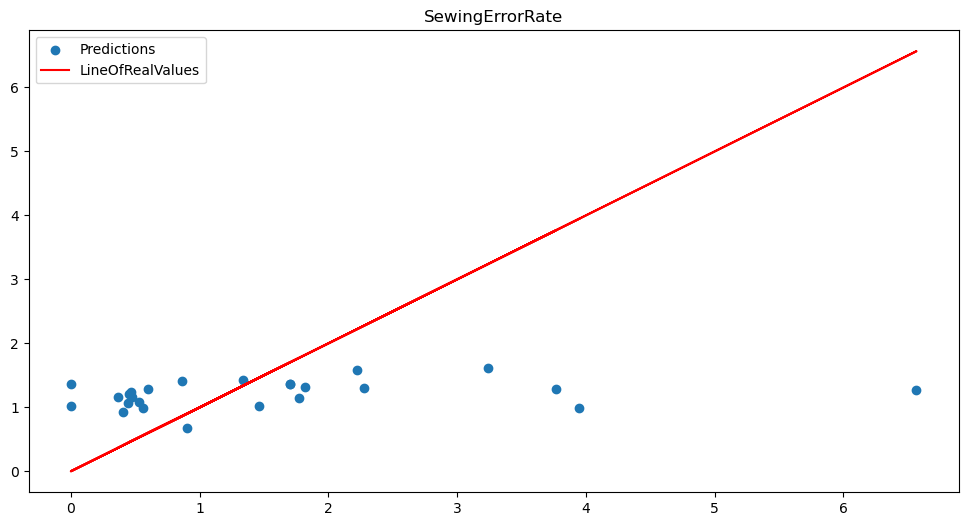

In [39]:
#Chart to show the closeness of the SewingErrorRate predictions to the true values is being plaotted
index = 1
DrawChart(outputName[index], testY[:, index], predictions[:, index])

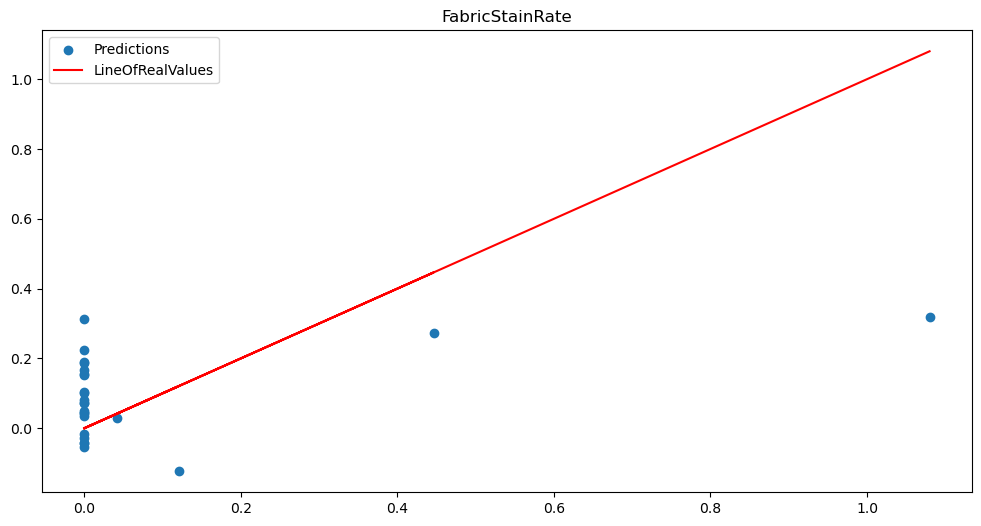

In [40]:
#Chart to show the closeness of the FabricStainRate predictions to the true values is being plaotted
index = 2
DrawChart(outputName[index], testY[:, index], predictions[:, index])

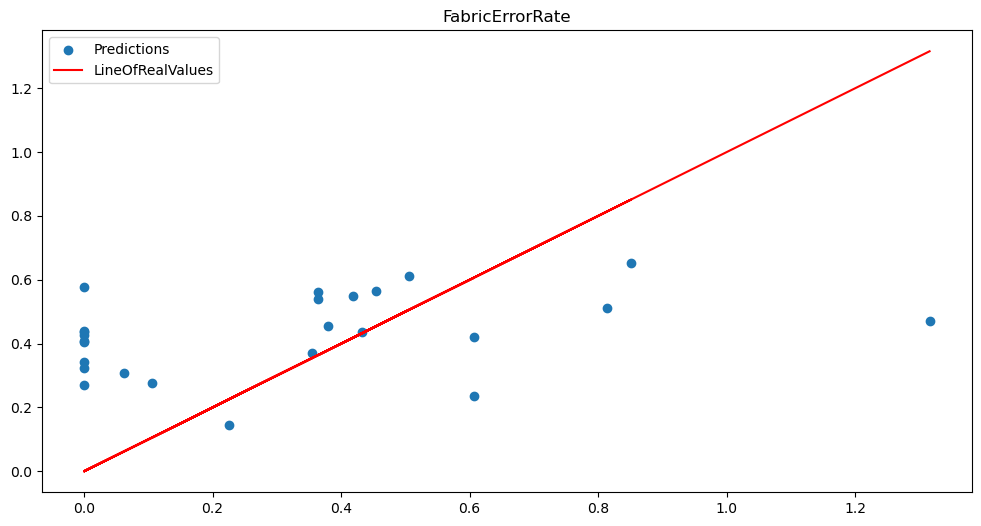

In [41]:
#Chart to show the closeness of the FabricErrorRate predictions to the true values is being plaotted
index = 3
DrawChart(outputName[index], testY[:, index], predictions[:, index])

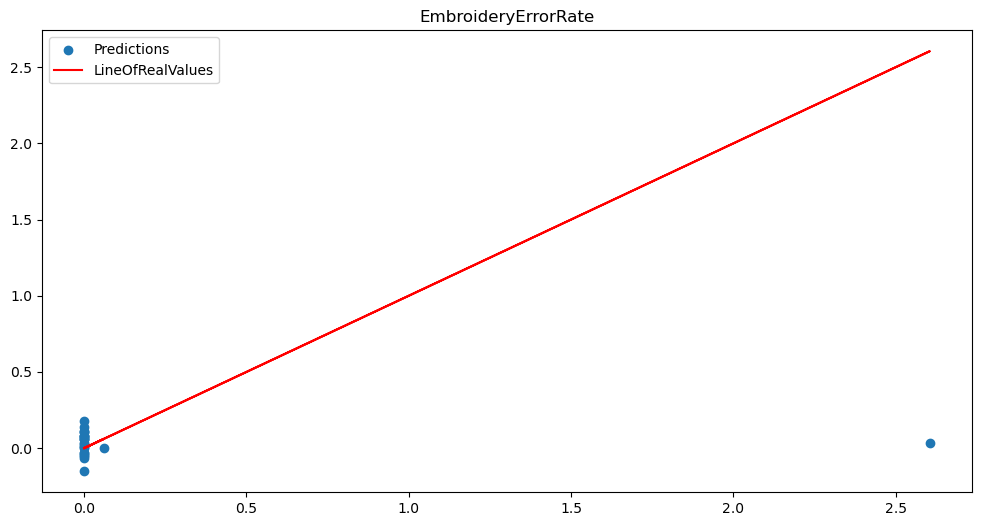

In [42]:
#Chart to show the closeness of the EmbroideryErrorRate predictions to the true values is being plaotted
index = 4
DrawChart(outputName[index], testY[:, index], predictions[:, index])

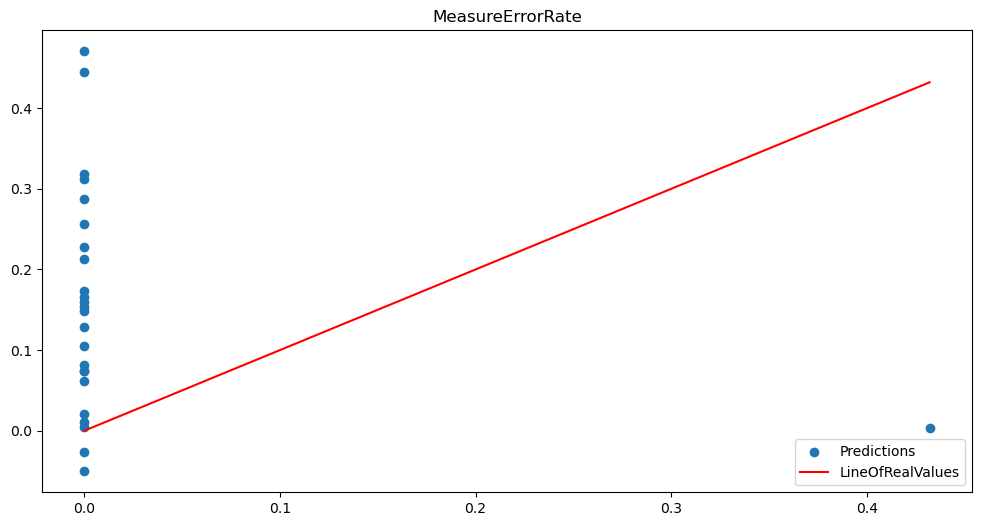

In [43]:
#Chart to show the closeness of the MeasureErrorRate predictions to the true values is being plaotted
index = 5
DrawChart(outputName[index], testY[:, index], predictions[:, index])

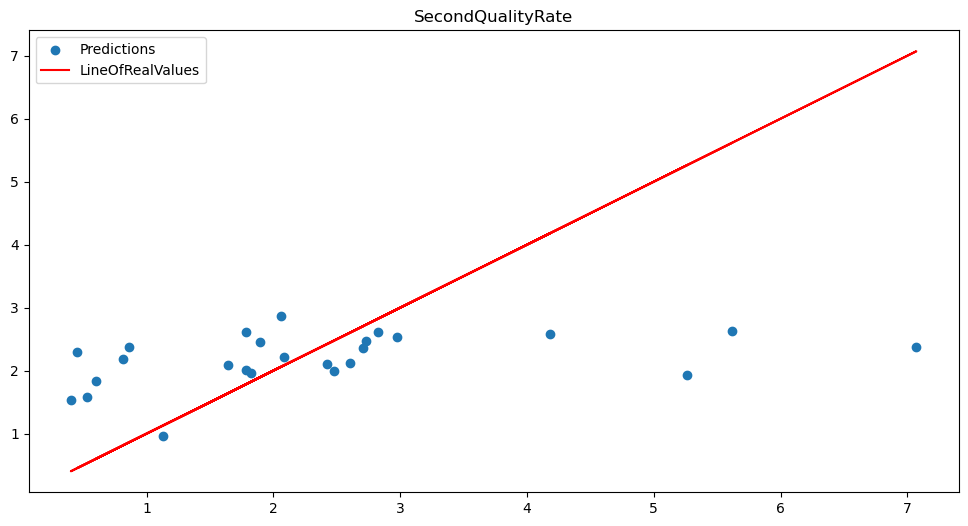

In [44]:
#Chart to show the closeness of the SecondQualityRate predictions to the true values is being plaotted
index = 6
DrawChart(outputName[index], testY[:, index], predictions[:, index])

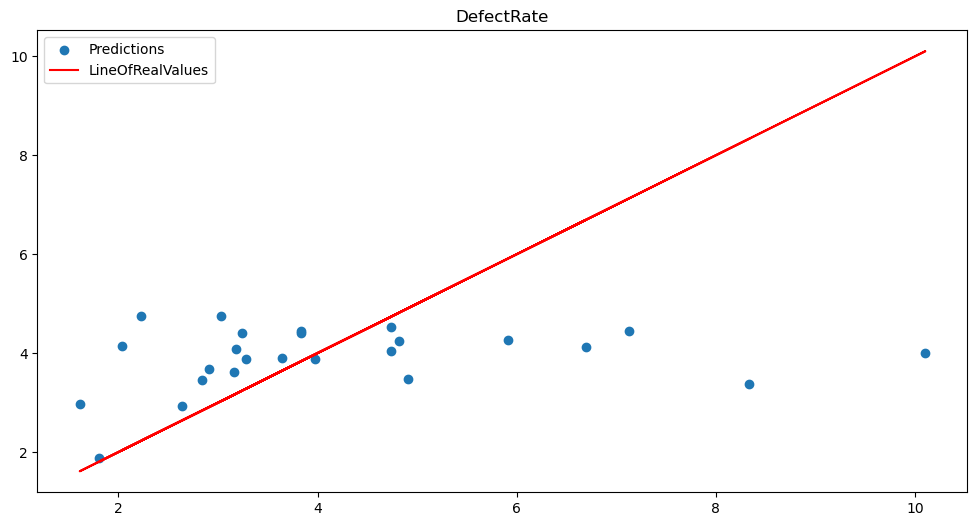

In [45]:
#Chart to show the closeness of the DefectRate predictions to the true values is being plaotted
index = 7
DrawChart(outputName[index], testY[:, index], predictions[:, index])

In [46]:
#Information of resultFram is being printed
resultFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 27 non-null     object 
 1   Data                  27 non-null     object 
 2   ColumName             27 non-null     object 
 3   MeanAbsoluteError     27 non-null     float64
 4   MeanSquaredError      27 non-null     float64
 5   SqrtMeanSquaredError  27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.4+ KB


In [47]:
#Statistical information of resultFram is being printed
resultFrame.describe()

,MeanAbsoluteError,MeanSquaredError,SqrtMeanSquaredError
count,27.000000,27.000000,27.000000
mean,0.645084,1.391920,0.934071
std,0.535304,1.674248,0.692873
min,0.087554,0.011931,0.109230
25%,0.177507,0.128612,0.357706
50%,0.450781,0.631999,0.794983
75%,1.038385,2.273642,1.507685
max,1.957994,6.012466,2.452033


In [48]:
#resultFrame is being saved as pkl files
resultFrame.to_pickle('../../Model/MultiOutput/NeuralNetwork/ResultFrame.pkl')